<pre>
롱포맷에서 와이드포맷으로 변경된 파일[sigungu_wide.csv]가 생성됨

EDA 및 머신러닝을 위해 와이드포맷으로 변경
각 행에서 유일한 key값을 가지도록 '지역'열 추가
</pre>

## [시도] : 와이드 포맷

In [2]:
path = './data/'
import pandas as pd

In [3]:
sido = pd.read_csv(path + 'sido.csv', encoding='cp949', engine='python')
sido.head()

,년도,시도,시군구,안전지표명,안전지표값
0,2008,서울특별시,NaN,자연재해 발생건수,0.00330
1,2008,부산광역시,NaN,자연재해 발생건수,0.00131
2,2008,대구광역시,NaN,자연재해 발생건수,0.00226
3,2008,인천광역시,NaN,자연재해 발생건수,0.00298
4,2008,광주광역시,NaN,자연재해 발생건수,0.00997


In [4]:
sido['지역'] = sido.년도.astype(str) +'_'+ sido.시도.astype(str)

In [5]:
#sigungu_wideformat
sido_wide = sido.pivot_table(values='안전지표값',index=['년도','시도','지역'],columns='안전지표명')
sido_wide.reset_index(level=['년도','시도','지역'],col_level=0,inplace=True)
sido_wide.to_csv(path+'sido_wide.csv',encoding='cp949',index=False)

In [6]:
sido_wide.shape

(132, 324)

In [7]:
sido_wide.head(3)

안전지표명,년도,시도,지역,1인가구수,5대범죄 발생건수,가로등수,가스공급설비 면적,가스사고 발생건수,가스사고 부상자수,가스사고 사망자수,...,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재예방교육을 받은 주민 비율,화재피해 경감액,화학물질 및 화학제품 제조업 업체수(의약품제외),화학물질 배출량,황사 발생건수
0,2008,강원도,2008_강원도,NaN,NaN,337.70313,4.83781,NaN,NaN,NaN,...,0.13965,74581.15608,0.69158,3.82363,0.26359,134.03,4.111740e+05,0.71818,47.20130,0.00096
1,2008,경기도,2008_경기도,NaN,NaN,243.18014,26.34827,NaN,NaN,NaN,...,0.06933,63612.79018,0.52043,1.61981,0.14299,13.51,1.176675e+06,2.19787,785.64750,0.00148
2,2008,경상남도,2008_경상남도,NaN,NaN,367.58438,12.35899,NaN,NaN,NaN,...,0.13450,90510.52361,0.59432,6.26534,0.23507,24.58,3.436649e+06,1.74854,836.85569,0.00048


## [시군구] : 와이드 포맷

In [8]:
path = './data/'
import pandas as pd

In [28]:
sigungu = pd.read_csv(path + 'sigungu.csv', encoding='cp949', engine='python')
sigungu.head()

,년도,시도,시군구,안전지표명,안전지표값
0,2008,서울특별시,종로구,자연재해 발생건수,0.0
1,2008,서울특별시,중구,자연재해 발생건수,0.0
2,2008,서울특별시,용산구,자연재해 발생건수,0.0
3,2008,서울특별시,성동구,자연재해 발생건수,0.0
4,2008,서울특별시,광진구,자연재해 발생건수,0.0


In [37]:
a = sigungu.groupby(['시도','시군구']).sum().reset_index()
a['지역'] = a.시도.astype(str) +'_'+ a.시군구.astype(str)
a
len(set(a.지역))

230

In [10]:
sigungu['지역'] = sigungu.년도.astype(str) +'_'+ sigungu.시도.astype(str) +'_'+ sigungu.시군구.astype(str) 

In [11]:
#sigungu_wideformat
sigungu_wide= sigungu.pivot_table(values='안전지표값',index=['년도','시도','시군구','지역'],columns='안전지표명')
sigungu_wide.reset_index(level=['년도','시도','시군구','지역'],col_level=0,inplace=True)
sigungu_wide.to_csv(path+'sigungu_wide.csv',encoding='cp949',index=False)

In [12]:
sigungu_wide.head(3)

안전지표명,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가로등수,가스공급설비 면적,가스사고 발생건수,가스사고 부상자수,...,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재예방교육을 받은 주민 비율,화재피해 경감액,화학물질 및 화학제품 제조업 업체수(의약품제외),황사 발생건수
0,2008,강원도,강릉시,2008_강원도_강릉시,NaN,NaN,193.98233,NaN,NaN,NaN,...,14.46817,0.04535,41031.23129,0.40819,4.12728,0.15511,99.88,120718.1020,0.18142,0.01154
1,2008,강원도,고성군,2008_강원도_고성군,NaN,NaN,78.00415,NaN,NaN,NaN,...,24.02659,0.00000,93319.29039,0.65826,1.97479,0.18227,NaN,256935.7865,NaN,NaN
2,2008,강원도,동해시,2008_강원도_동해시,NaN,NaN,424.40922,NaN,NaN,NaN,...,12.41568,0.10346,24486.09444,0.51732,4.24202,0.19765,442.98,349764.8264,0.31039,0.05553


In [14]:
import missingno as msno
print(sigungu_wide.shape)
msno.matrix(sigungu_wide)

(1838, 304)


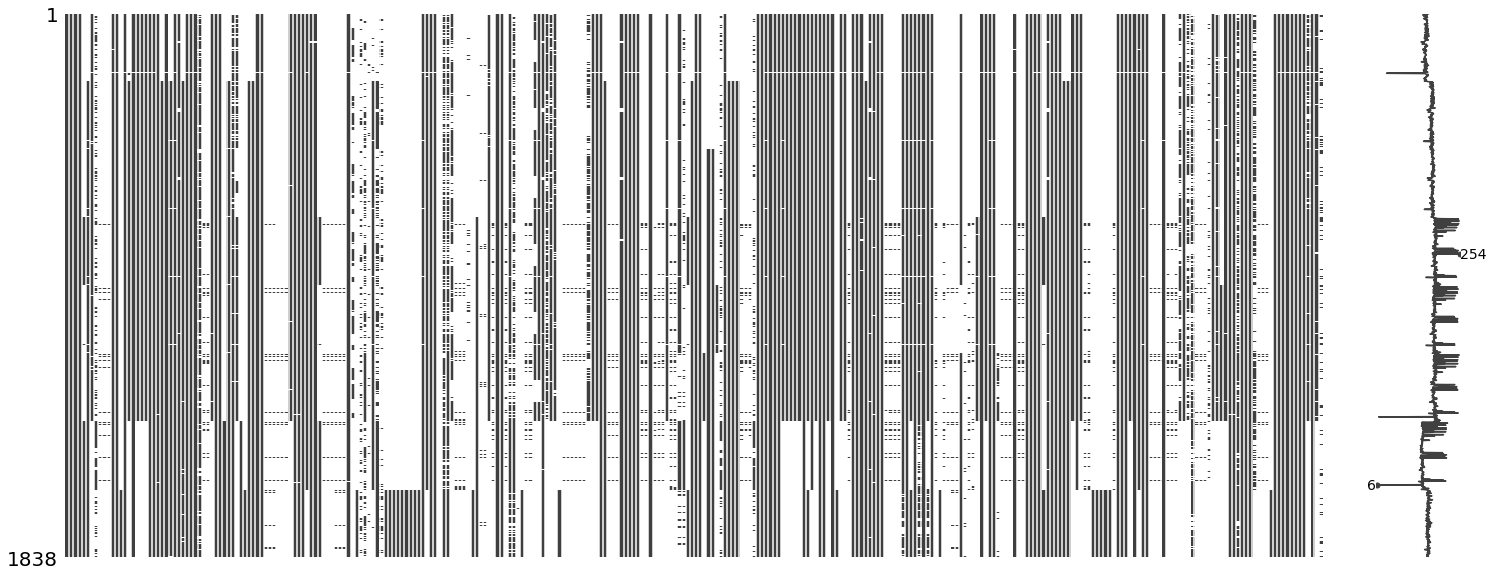

In [15]:
msno.matrix(sigungu_wide)